In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model, cluster, datasets
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, silhouette_score
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.impute import SimpleImputer
from itertools import chain 
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import random

In [2]:
#df1= pd.read_csv('df1.csv')
#df1.shape

In [3]:
#df2= pd.read_csv('df2.csv')
#df2.shape

In [4]:
df3= pd.read_csv('TMDB_movie.csv')
#df3.shape

In [5]:
#df_user= pd.read_csv('ratings45.csv')
df_api= pd.read_csv('movie-API.csv')
df_top100= pd.read_csv('100_movie.csv')

In [6]:
df_top100

,rank,title,description,image,big_image,genre,thumbnail,rating,id,year,imdbid,imdb_link
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,['Drama'],https://m.media-amazon.com/images/M/MV5BMDFkYT...,9.3,top1,1994,tt0111161,https://www.imdb.com/title/tt0111161
1,2,The Godfather,The aging patriarch of an organized crime dyna...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BM2MyNj...,9.2,top2,1972,tt0068646,https://www.imdb.com/title/tt0068646
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"['Action', 'Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMTMxNT...,9.0,top3,2008,tt0468569,https://www.imdb.com/title/tt0468569
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMWMwMG...,9.0,top4,1974,tt0071562,https://www.imdb.com/title/tt0071562
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMWU4N2...,9.0,top5,1957,tt0050083,https://www.imdb.com/title/tt0050083
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Reservoir Dogs,When a simple jewelry heist goes horribly wron...,https://m.media-amazon.com/images/M/MV5BZmExNm...,https://m.media-amazon.com/images/M/MV5BZmExNm...,"['Crime', 'Thriller']",https://m.media-amazon.com/images/M/MV5BZmExNm...,8.3,top96,1992,tt0105236,https://www.imdb.com/title/tt0105236
96,97,Ikiru,A bureaucrat tries to find meaning in his life...,https://m.media-amazon.com/images/M/MV5BYWM1Ym...,https://m.media-amazon.com/images/M/MV5BYWM1Ym...,['Drama'],https://m.media-amazon.com/images/M/MV5BYWM1Ym...,8.3,top97,1952,tt0044741,https://www.imdb.com/title/tt0044741
97,98,Lawrence of Arabia,"The story of T.E. Lawrence, the English office...",https://m.media-amazon.com/images/M/MV5BYWY5Zj...,https://m.media-amazon.com/images/M/MV5BYWY5Zj...,"['Adventure', 'Biography', 'Drama']",https://m.media-amazon.com/images/M/MV5BYWY5Zj...,8.3,top98,1962,tt0056172,https://www.imdb.com/title/tt0056172
98,99,Citizen Kane,Following the death of publishing tycoon Charl...,https://m.media-amazon.com/images/M/MV5BYjBiOT...,https://m.media-amazon.com/images/M/MV5BYjBiOT...,"['Drama', 'Mystery']",https://m.media-amazon.com/images/M/MV5BYjBiOT...,8.3,top99,1941,tt0033467,https://www.imdb.com/title/tt0033467


In [7]:
df_combined = pd.concat([df3, df_api], ignore_index=True)
df_combined.shape

(1040830, 25)

In [8]:
#df_combined.columns

In [9]:
# Identify duplicates based on the 'original_title' column
duplicates = df_combined[df_combined.duplicated(subset='original_title', keep=False)]
duplicates

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,_id
0,27205.0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",NaN
2,155.0,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",NaN
3,19995.0,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",NaN
4,24428.0,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",NaN
7,550.0,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,"dual identity, rage and hate, based on novel o...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040825,1581.0,The Holiday,7.078,4592,Released,NaN,194168700,136,False,NaN,...,NaN,19.822,NaN,NaN,"Comedy, Romance",NaN,NaN,NaN,NaN,65ef3f30675dde801085315d
1040826,708.0,The Living Daylights,6.505,1580,Released,NaN,191185897,130,False,NaN,...,NaN,20.543,NaN,NaN,"Action, Adventure, Thriller",NaN,NaN,NaN,NaN,65ef3f34675dde8010853833
1040827,9919.0,How to Lose a Guy in 10 Days,6.754,3496,Released,NaN,177502387,116,False,NaN,...,NaN,22.124,NaN,NaN,"Comedy, Romance",NaN,NaN,NaN,NaN,65ef3f32675dde80108532bf
1040828,6068.0,Six Days Seven Nights,6.039,1325,Released,NaN,164839294,98,False,NaN,...,NaN,16.824,NaN,NaN,"Adventure, Action, Comedy, Romance",NaN,NaN,NaN,NaN,65ef3f36675dde8010853a04


In [10]:
df_combined_unique = df_combined.drop_duplicates(subset='original_title', keep='first')
#df_combined_unique

In [11]:
df_combined_unique.dtypes

id                      float64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity               object
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
_id                      object
dtype: object

In [12]:
df_combined_unique.loc[df_combined_unique['popularity'].apply(lambda x: len(str(x)) > 10), 'popularity'] = np.nan
df_combined_unique.loc[df_combined_unique['budget'].apply(lambda x: len(str(x)) < 3), 'budget'] = np.nan
df_combined_unique.loc[df_combined_unique['revenue'].apply(lambda x: len(str(x)) < 3), 'revenue'] = np.nan
df_combined_unique.loc[df_combined_unique['runtime'].apply(lambda x: x < 5), 'runtime'] = np.nan
df_combined_unique.loc[df_combined_unique['vote_count'].apply(lambda x: x == 0), 'vote_count'] = np.nan
df_combined_unique.loc[df_combined_unique['vote_average'].apply(lambda x: x == 0), 'vote_average'] = np.nan

In [13]:
df_combined_unique.isnull().sum()

id                           0
title                        1
vote_average            606369
vote_count              606151
status                       0
release_date            116038
revenue                 910695
runtime                 280719
adult                        0
backdrop_path           663016
budget                  889178
homepage                828393
imdb_id                 413434
original_language            0
original_title               1
overview                177388
popularity                  19
poster_path             262242
tagline                 797950
genres                  348227
production_companies    486799
production_countries    382367
spoken_languages        368240
keywords                660987
_id                     928065
dtype: int64

In [14]:
# Clean the invalid data and drop columns
columns_to_check = ['original_title', 'popularity', 'title']
df_combined_unique = df_combined_unique.dropna(subset=columns_to_check)

# Convert the 'release_date' column to datetime format
df_combined_unique['release_date'] = pd.to_datetime(df_combined_unique['release_date'])

# create var for year
df_combined_unique['year'] = df_combined_unique['release_date'].dt.year

#clean var for year
df_combined_unique.loc[df_combined_unique['year'].apply(lambda x: x > 2027), 'year'] = np.nan

# #drop columns
drop_columns = ['id', 'title', 'imdb_id', 'homepage','tagline', 'keywords', 'overview', 'status', 'release_date', '_id', 'backdrop_path', 'poster_path', 'spoken_languages']
df_combined_unique.drop(drop_columns, axis=1, inplace=True)

In [15]:
# clean variables
condition1 = df_combined_unique['popularity'] > 50
condition2 = df_combined_unique['year'] <1850
condition3 = df_combined_unique['budget'] > 3.000000e+08
condition4 = df_combined_unique['revenue'] > 1.500000e+09
df_combined_unique = df_combined_unique[~condition1]
df_combined_unique = df_combined_unique[~condition2]
df_combined_unique = df_combined_unique[~condition3]
df_combined_unique = df_combined_unique[~condition4]
df_combined_unique.reset_index

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\569468263.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition2]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\569468263.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition3]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\569468263.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition4]


<bound method DataFrame.reset_index of          vote_average  vote_count       revenue  runtime  adult       budget  \
8               7.906     26638.0  7.727766e+08    121.0  False  170000000.0   
27              7.390     21053.0  1.349926e+09    135.0  False  200000000.0   
31              7.193     20636.0  6.943947e+08    142.0  False   75000000.0   
36              6.995     20269.0  3.705698e+08    124.0  False  140000000.0   
37              5.909     20097.0  7.468469e+08    123.0  False  175000000.0   
...               ...         ...           ...      ...    ...          ...   
1040694           NaN         NaN           NaN      NaN  False          NaN   
1040695           NaN         NaN           NaN     90.0  False          NaN   
1040697           NaN         NaN           NaN      5.0  False          NaN   
1040698           NaN         NaN           NaN      NaN  False          NaN   
1040699           NaN         NaN           NaN     31.0  False          NaN   



In [16]:
#df_combined_unique.isnull().sum()

In [17]:
df_combined_unique

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,year
8,7.906,26638.0,7.727766e+08,121.0,False,170000000.0,en,Guardians of the Galaxy,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,2014.0
27,7.390,21053.0,1.349926e+09,135.0,False,200000000.0,en,Black Panther,43.665,"Action, Adventure, Science Fiction",Marvel Studios,United States of America,2018.0
31,7.193,20636.0,6.943947e+08,142.0,False,75000000.0,en,The Hunger Games,29.577,"Science Fiction, Adventure, Fantasy","Lionsgate, Color Force",United States of America,2012.0
36,6.995,20269.0,3.705698e+08,124.0,False,140000000.0,en,Captain America: The First Avenger,43.665,"Action, Adventure, Science Fiction",Marvel Studios,United States of America,2011.0
37,5.909,20097.0,7.468469e+08,123.0,False,175000000.0,en,Suicide Squad,35.356,"Action, Adventure, Fantasy","DC Entertainment, Dune Entertainment, Warner B...",United States of America,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040694,NaN,NaN,NaN,NaN,False,NaN,pt,As Carrancas do Rio São Francisco,0.6,NaN,NaN,NaN,1981.0
1040695,NaN,NaN,NaN,90.0,False,NaN,en,Stalin: Man of Steel,0.882,NaN,"History, Discovery Channel",NaN,2003.0
1040697,NaN,NaN,NaN,5.0,False,NaN,en,After Earth: The Nature of the Future,0.6,Documentary,NaN,NaN,2013.0
1040698,NaN,NaN,NaN,NaN,False,NaN,en,Ketnet musical 'Kadanza,0.6,NaN,NaN,NaN,NaN


In [18]:
#change variables to numeric:
cols = ['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']
for colname in cols:
    df_combined_unique[colname] = pd.to_numeric(df_combined_unique[colname], errors='coerce')

In [19]:
df_combined_unique.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity,year
count,320801.000000,321020.000000,1.689300e+04,646437.000000,3.841300e+04,927130.000000,811078.000000
mean,6.098774,53.113030,3.203315e+07,73.000311,6.074310e+06,1.220300,1999.306747
std,1.943205,431.441964,8.827949e+07,64.505642,1.843947e+07,2.543149,26.443121
min,0.500000,1.000000,-1.200000e+01,5.000000,1.000000e+02,0.000000,1865.000000
25%,5.000000,1.000000,1.533030e+05,25.000000,2.520000e+03,0.600000,1989.000000
50%,6.000000,3.000000,3.000000e+06,78.000000,6.000000e+04,0.600000,2010.000000
75%,7.040000,8.000000,2.117056e+07,98.000000,2.650000e+06,0.904000,2018.000000
max,10.000000,26638.000000,1.349926e+09,14400.000000,3.000000e+08,49.963000,2027.000000


In [20]:
# Make a copy of the relevant columns
df_copy = df_combined_unique[['popularity', 'budget', 'runtime', 'revenue', 'vote_average', 'vote_count']].copy()

# Filter out rows with non-NaN budget values
df_train = df_copy.dropna(subset=['budget'])

# Extract features and target
X_train = df_train[['popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']]
y_train = df_train['budget']

# Handle missing values in the features 
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Prepare the prediction dataset
X_pred = df_copy[['popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']]

# Impute missing values in the prediction features
X_pred_imputed = imputer.transform(X_pred)

# Predict NaN values
df_copy['budget_predicted'] = model.predict(X_pred_imputed)

# Replace negative predicted values with zero
df_copy['budget_predicted'] = np.where(df_copy['budget_predicted'] < 0, 0, df_copy['budget_predicted'])

# Replace NaN values in 'budget' with predicted values
df_copy['budget'] = df_copy.apply(
    lambda row: row['budget_predicted'] if pd.isna(row['budget']) else row['budget'],
    axis=1
)

# Drop the 'budget_predicted' column if no longer needed
df_copy.drop('budget_predicted', axis=1, inplace=True)

# Update the original DataFrame with the predicted budget values
df_combined_unique['budget_predicted'] = df_copy['budget']


In [21]:
# Make a copy of the relevant columns
df_copy = df_combined_unique[['popularity', 'budget_predicted', 'runtime', 'revenue', 'vote_average', 'vote_count']].copy()

# Filter out rows with non-NaN values
df_train = df_copy.dropna(subset=['runtime'])

# Extract features and target
X_train = df_train[['popularity', 'budget_predicted', 'revenue', 'vote_average', 'vote_count']]
y_train = df_train['runtime']

# Handle missing values in the features 
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Prepare the prediction dataset
X_pred = df_copy[['popularity', 'budget_predicted', 'revenue', 'vote_average', 'vote_count']]

# Impute missing values in the prediction features
X_pred_imputed = imputer.transform(X_pred)

# Predict NaN values
df_copy['runtime_predicted'] = model.predict(X_pred_imputed)

# Replace negative predicted values with zero
df_copy['runtime_predicted'] = np.where(df_copy['runtime_predicted'] < 0, 0, df_copy['runtime_predicted'])

# Replace NaN values with predicted values
df_copy['runtime'] = df_copy.apply(
    lambda row: row['runtime_predicted'] if pd.isna(row['runtime']) else row['runtime'],
    axis=1
)

# Drop the 'predicted' column if no longer needed
df_copy.drop('runtime_predicted', axis=1, inplace=True)

# Update the original DataFrame with the predicted  values
df_combined_unique['runtime_predicted'] = df_copy['runtime']


In [22]:
# Make a copy of the relevant columns
df_copy = df_combined_unique[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue', 'vote_average', 'vote_count']].copy()

# Filter out rows with non-NaN values
df_train = df_copy.dropna(subset=['revenue'])

# Extract features and target
X_train = df_train[['popularity', 'budget_predicted', 'runtime_predicted', 'vote_average', 'vote_count']]
y_train = df_train['revenue']

# Handle missing values in the features 
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Prepare the prediction dataset
X_pred = df_copy[['popularity', 'budget_predicted', 'runtime_predicted', 'vote_average', 'vote_count']]

# Impute missing values in the prediction features
X_pred_imputed = imputer.transform(X_pred)

# Predict NaN values
df_copy['revenue_predicted'] = model.predict(X_pred_imputed)


# Replace negative predicted values with zero
df_copy['revenue_predicted'] = np.where(df_copy['revenue_predicted'] < 0, 0, df_copy['revenue_predicted'])


# Replace NaN values in  with predicted values
df_copy['revenue'] = df_copy.apply(
    lambda row: row['revenue_predicted'] if pd.isna(row['revenue']) else row['revenue'],
    axis=1
)

# Drop the 'predicted' column if no longer needed
df_copy.drop('revenue_predicted', axis=1, inplace=True)

# Update the original DataFrame with the predicted  values
df_combined_unique['revenue_predicted'] = df_copy['revenue']


In [23]:
#df_combined_unique.isnull().sum()

In [24]:
# Make a copy of the relevant columns
df_copy = df_combined_unique[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_average', 'vote_count']].copy()

# Filter out rows with non-NaN values
df_train = df_copy.dropna(subset=['vote_average'])

# Extract features and target
X_train = df_train[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_count']]
y_train = df_train['vote_average']

# Handle missing values in the features 
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Prepare the prediction dataset
X_pred = df_copy[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_count']]

# Impute missing values in the prediction features
X_pred_imputed = imputer.transform(X_pred)

# Predict NaN values
df_copy['vote_predicted'] = model.predict(X_pred_imputed)


# Replace negative predicted values with zero
df_copy['vote_predicted'] = np.where(df_copy['vote_predicted'] < 0, 0, df_copy['vote_predicted'])

# Replace NaN values in  with predicted values
df_copy['vote_average'] = df_copy.apply(
    lambda row: row['vote_predicted'] if pd.isna(row['vote_average']) else row['vote_average'],
    axis=1
)

# Drop the 'predicted' column if no longer needed
df_copy.drop('vote_predicted', axis=1, inplace=True)

# Update the original DataFrame with the predicted  values
df_combined_unique['vote_predicted'] = df_copy['vote_average']


In [25]:
# Make a copy of the relevant columns
df_copy = df_combined_unique[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_predicted', 'vote_count']].copy()

# Filter out rows with non-NaN values
df_train = df_copy.dropna(subset=['vote_count'])

# Extract features and target
X_train = df_train[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_predicted']]
y_train = df_train['vote_count']

# Handle missing values in the features 
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Prepare the prediction dataset
X_pred = df_copy[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_predicted']]

# Impute missing values in the prediction features
X_pred_imputed = imputer.transform(X_pred)

# Predict NaN values
df_copy['vote_count_predicted'] = model.predict(X_pred_imputed)


# Replace negative predicted values with zero
df_copy['vote_count_predicted'] = np.where(df_copy['vote_count_predicted'] < 0, 0, df_copy['vote_count_predicted'])


# Replace NaN values in  with predicted values
df_copy['vote_count'] = df_copy.apply(
    lambda row: row['vote_count_predicted'] if pd.isna(row['vote_count']) else row['vote_count'],
    axis=1
)

# Drop the 'predicted' column if no longer needed
df_copy.drop('vote_count_predicted', axis=1, inplace=True)

# Update the original DataFrame with the predicted  values
df_combined_unique['vote_count_predicted'] = df_copy['vote_count']

In [26]:
df_combined_unique.describe() 

,vote_average,vote_count,revenue,runtime,budget,popularity,year,budget_predicted,runtime_predicted,revenue_predicted,vote_predicted,vote_count_predicted
count,320801.000000,321020.000000,1.689300e+04,646437.000000,3.841300e+04,927130.000000,811078.000000,9.271300e+05,927130.000000,9.271300e+05,927130.000000,927130.000000
mean,6.098774,53.113030,3.203315e+07,73.000311,6.074310e+06,1.220300,1999.306747,2.579705e+06,72.685306,1.522401e+07,6.446690,162.042693
std,1.943205,431.441964,8.827949e+07,64.505642,1.843947e+07,2.543149,26.443121,4.665483e+06,54.358023,1.488381e+07,1.176271,272.559288
min,0.500000,1.000000,-1.200000e+01,5.000000,1.000000e+02,0.000000,1865.000000,0.000000e+00,0.000000,-1.200000e+01,0.000000,0.000000
25%,5.000000,1.000000,1.533030e+05,25.000000,2.520000e+03,0.600000,1989.000000,1.041307e+06,53.000000,4.227976e+06,6.534499,7.000000
50%,6.000000,3.000000,3.000000e+06,78.000000,6.000000e+04,0.600000,2010.000000,2.063251e+06,71.932681,2.036570e+07,6.636697,215.220821
75%,7.040000,8.000000,2.117056e+07,98.000000,2.650000e+06,0.904000,2018.000000,3.003018e+06,90.000000,2.066913e+07,6.665145,218.806743
max,10.000000,26638.000000,1.349926e+09,14400.000000,3.000000e+08,49.963000,2027.000000,5.131088e+08,14400.000000,1.349926e+09,42.671382,26638.000000


In [27]:
# # Filter the DataFrame to show only rows where revenue_predicted is 3.000000e+09
# filtered_df = df_combined_unique[df_combined_unique['revenue_predicted'] == 3.000000e+09]
# filtered_df


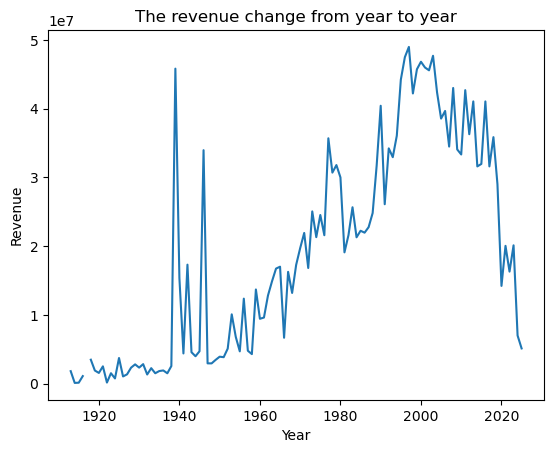

In [28]:
# Draw the line char for the change of the revenue
revenues = df_combined_unique.groupby('year')['revenue'].mean()

plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

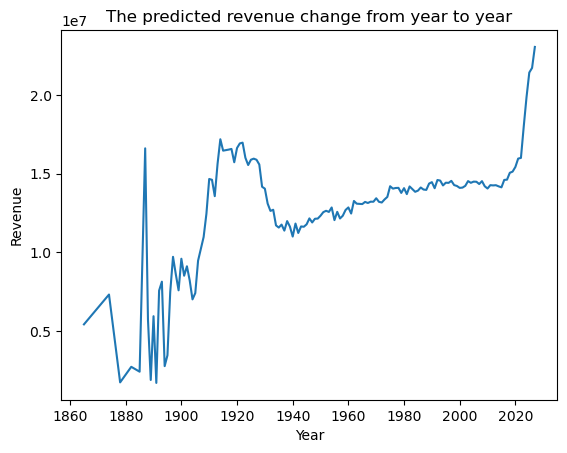

In [29]:
# Draw the line char for the change of the revenue
revenues = df_combined_unique.groupby('year')['revenue_predicted'].mean()

plt.plot(revenues)
plt.title('The predicted revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the line chart above, the revenue changed drastically over the year, especially during the period of 1960s. However, the revenue shows an increasing trend from the overall perspective. Next, we need to compare the revenue in different years. Since there are too many years, we aggregate them into decades.

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\1497650096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_dis = df_combined_unique.groupby('decade').revenue.mean()


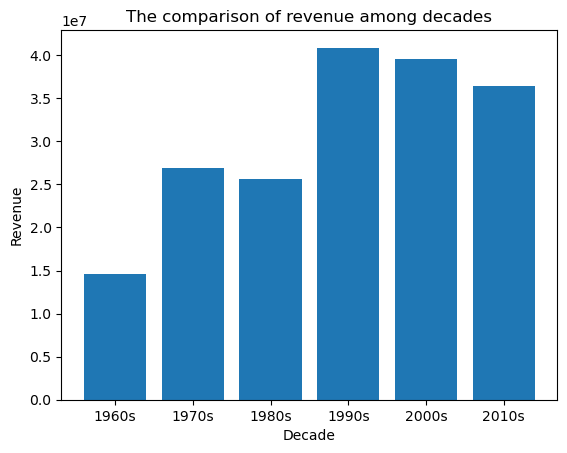

In [30]:
# Aggregate years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df_combined_unique['decade'] = pd.cut(df_combined_unique['year'], bin_edges, labels=bin_names)

# Draw the bar chart to compare the revenue in differet decades
rev_dis = df_combined_unique.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

Now, we need to discover the correlation between different variables. In this question, three variables will be selected:'popularity', 'vote_average', and 'budget'. The scatterplot and correlation calculation will be used to analyze these correlations. The first group to discover is the correlation of 'popularity' and 'revenue'.

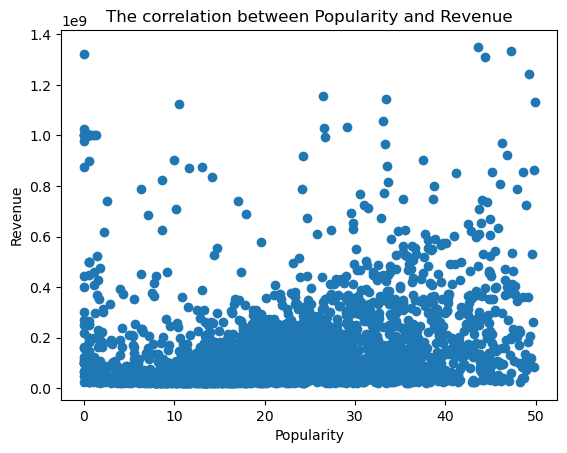

In [31]:
# Extract the high revenue dataframe
high_revenue = df_combined_unique.revenue.quantile(.75)
high_rev_df = df_combined_unique[df_combined_unique.revenue > high_revenue]
high_rev_df.revenue.describe()

# Draw the scatterplot of the popularity and revenue
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [32]:
#not so high

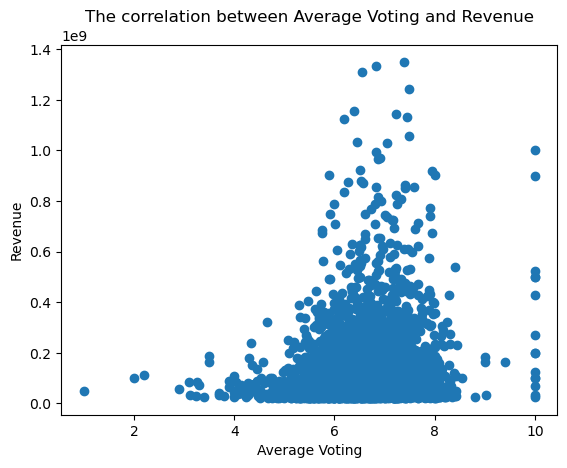

In [33]:
# Draw the scatterplot of the vote_average and revenue
plt.scatter(x=high_rev_df.vote_average, y=high_rev_df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [34]:
# Calculate the correlation between 'vote_average' and 'revenue'
high_rev_df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.136509
revenue,0.136509,1.000000


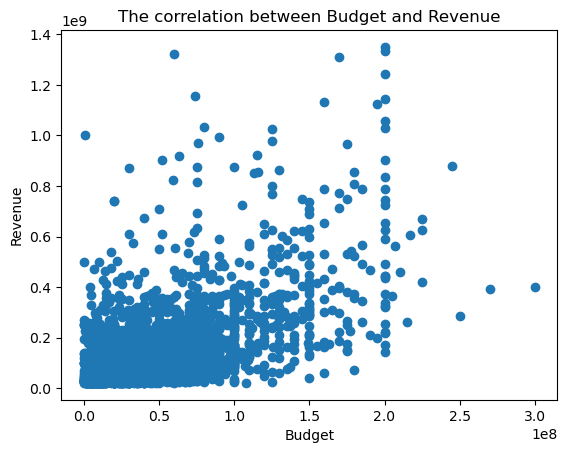

In [35]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [36]:
# Calculate the correlation between 'vote_average' and 'revenue'
high_rev_df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.00000,0.61748
revenue,0.61748,1.00000


In [37]:
df_genres = df_combined_unique[['year', 'genres', 'popularity']]
df_genres.head()

,year,genres,popularity
8,2014.0,"Action, Science Fiction, Adventure",33.255
27,2018.0,"Action, Adventure, Science Fiction",43.665
31,2012.0,"Science Fiction, Adventure, Fantasy",29.577
36,2011.0,"Action, Adventure, Science Fiction",43.665
37,2016.0,"Action, Adventure, Fantasy",35.356


Split the row with more than one genre into different rows 
/ 
source of the code: https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

In [38]:
# Drop or fill NaN values in the 'genres' column
df_combined_unique['genres'].fillna('', inplace=True)

# Function to split the genres
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# Calculate lengths of splits
lens = df_combined_unique['genres'].str.split(',').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({
    'year': np.repeat(df_combined_unique['year'], lens),
    'genres': chainer(df_combined_unique['genres']),
    'popularity': np.repeat(df_combined_unique['popularity'], lens)
})

# Strip any extra whitespace from the genres
df_genres['genres'] = df_genres['genres'].str.strip()


df_genres.head()

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\273833466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_unique['genres'].fillna('', inplace=True)


,year,genres,popularity
8,2014.0,Action,33.255
8,2014.0,Science Fiction,33.255
8,2014.0,Adventure,33.255
27,2018.0,Action,43.665
27,2018.0,Adventure,43.665


After splitting, we need to select the most popular genres for each year. The code below is sourced from https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group.

In [39]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\640495447.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_most_pop = df_pop.groupby('year', as_index=False).apply(func).reset_index(drop=True)


,year,genres,popularity
0,1865.0,Documentary,1.16200
1,1874.0,Documentary,4.00400
2,1878.0,Animation,0.74376
3,1882.0,Documentary,0.67100
4,1885.0,Animation,1.28400


Then, a scatterplot is drawn to show the change of the most popular genre over the year

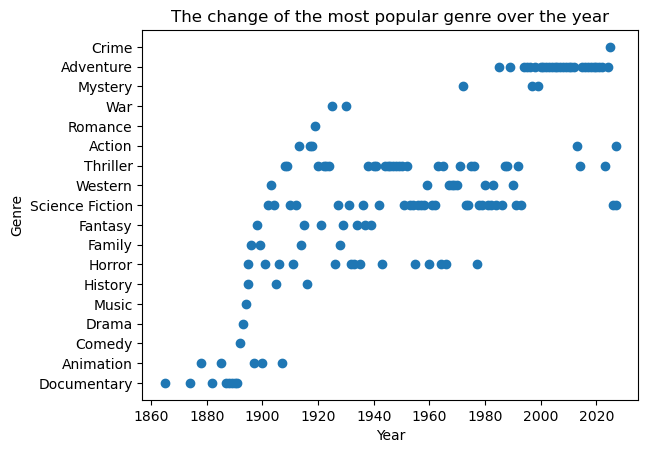

In [40]:
# Draw the scatterplot to show the change of the most popular genre
plt.scatter(df_most_pop.year, df_most_pop.genres)
plt.title('The change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

From the scatterplot above, it is easy to show that the most popular genre changed over the year. However, in some periods there are no or little changes. Overall, the most popular genre in 1990s is science fiction and thriller, while it becomes adventure in 2000s.

Next, in order to show the percentage of each genre, a pie chart is drawn sourced from https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py.

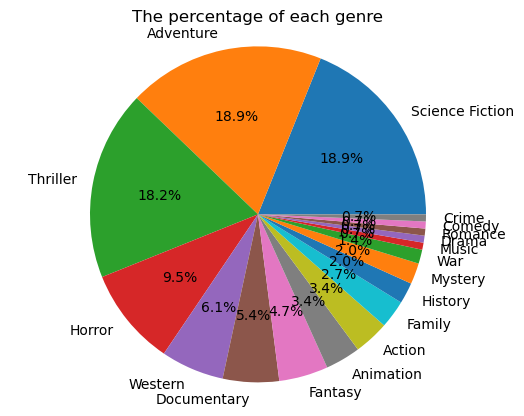

In [41]:
# Draw the pie chart of genres
sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

In [42]:
# Drop or fill NaN values in the 'genres' column
df_combined_unique['production_companies'].fillna('', inplace=True)
	
# Function to split the genres
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# Calculate lengths of splits
lens = df_combined_unique['production_companies'].str.split(',').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_production_companies = pd.DataFrame({
    'year': np.repeat(df_combined_unique['year'], lens),
    'production_companies': chainer(df_combined_unique['production_companies']),
    'popularity': np.repeat(df_combined_unique['popularity'], lens)
})

# Strip any extra whitespace from the genres
df_production_companies['production_companies'] = df_production_companies['production_companies'].str.strip()


df_production_companies.head()

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\1191634689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_unique['production_companies'].fillna('', inplace=True)


,year,production_companies,popularity
8,2014.0,Marvel Studios,33.255
27,2018.0,Marvel Studios,43.665
31,2012.0,Lionsgate,29.577
31,2012.0,Color Force,29.577
36,2011.0,Marvel Studios,43.665


In [43]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_production_companies.groupby(['year', 'production_companies'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\3487310523.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_most_pop = df_pop.groupby('year', as_index=False).apply(func).reset_index(drop=True)


,year,production_companies,popularity
0,1865.0,,1.162000
1,1874.0,,4.004000
2,1878.0,,0.738231
3,1882.0,,0.671000
4,1885.0,,1.284000


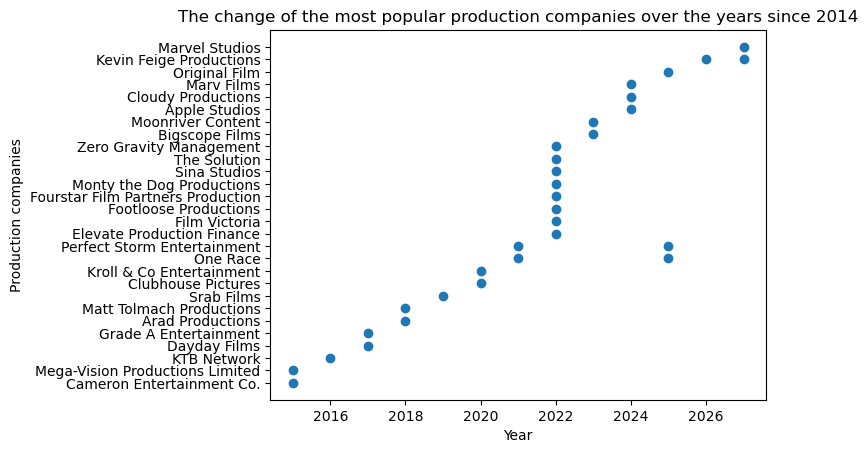

In [44]:
# Select only rows where the year is greater than 2014
df_most_pop_filtered = df_most_pop[df_most_pop['year'] > 2014]
# Draw the scatterplot to show the change of the most popular genre
plt.scatter(df_most_pop_filtered.year, df_most_pop_filtered.production_companies)
plt.title('The change of the most popular production companies over the years since 2014')
plt.xlabel('Year')
plt.ylabel('Production companies')

plt.show()

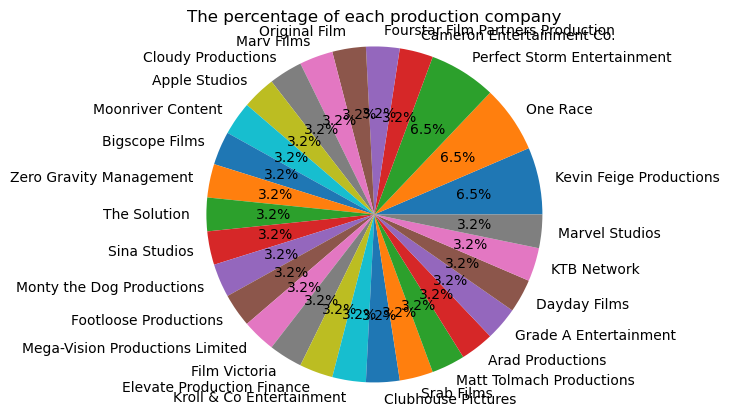

In [45]:
# Draw the pie chart of genres
sizes = df_most_pop_filtered.production_companies.value_counts().values
labels = df_most_pop_filtered.production_companies.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each production company')

plt.show()

In [46]:
# Define the condition for dropping values (e.g., values greater than a certain threshold)
condition1 = df_combined_unique['popularity'] > 25
condition2 = df_combined_unique['budget_predicted'] > 60000000
condition3 = df_combined_unique['runtime_predicted'] > 600
condition4 = df_combined_unique['revenue_predicted'] > 100000000
condition5 = df_combined_unique['vote_predicted'] > 9
condition6 = df_combined_unique['vote_predicted'] <3
condition7 = df_combined_unique['vote_count_predicted'] > 2500

# Use boolean indexing to select rows where the condition is False (i.e., keep rows where the condition is not met)
df_combined_unique = df_combined_unique[~condition1]
df_combined_unique = df_combined_unique[~condition2]
df_combined_unique = df_combined_unique[~condition3]
df_combined_unique = df_combined_unique[~condition4]
df_combined_unique = df_combined_unique[~condition5]
df_combined_unique = df_combined_unique[~condition6]
df_combined_unique = df_combined_unique[~condition7]
df_combined_unique.reset_index

C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\915880571.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition2]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\915880571.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition3]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\915880571.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition4]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\915880571.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition5]
C:\Users\SIWAR\AppData\Local\Temp\ipykernel_10568\915880571.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined_unique = df_combined_unique[~condition6]
C:\Users\S

<bound method DataFrame.reset_index of          vote_average  vote_count     revenue  runtime  adult      budget  \
1791            7.361      2497.0   5224938.0     89.0  False   5000000.0   
1793            7.203      2482.0  32935319.0    104.0  False  11000000.0   
1795            6.899      2479.0   4635300.0     85.0  False   2000000.0   
1797            6.666      2473.0  60917189.0    123.0  False  40000000.0   
1802            7.252      2459.0  83137603.0     81.0  False  21000000.0   
...               ...         ...         ...      ...    ...         ...   
1040694           NaN         NaN         NaN      NaN  False         NaN   
1040695           NaN         NaN         NaN     90.0  False         NaN   
1040697           NaN         NaN         NaN      5.0  False         NaN   
1040698           NaN         NaN         NaN      NaN  False         NaN   
1040699           NaN         NaN         NaN     31.0  False         NaN   

        original_language           

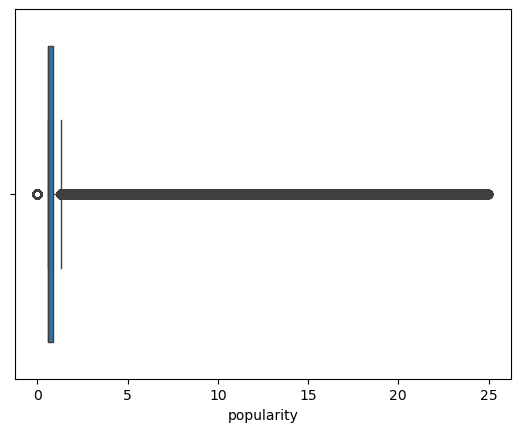

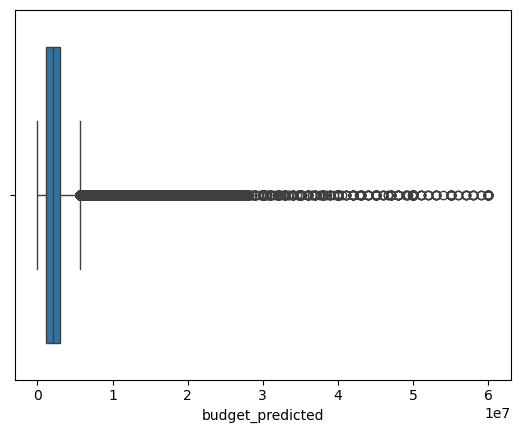

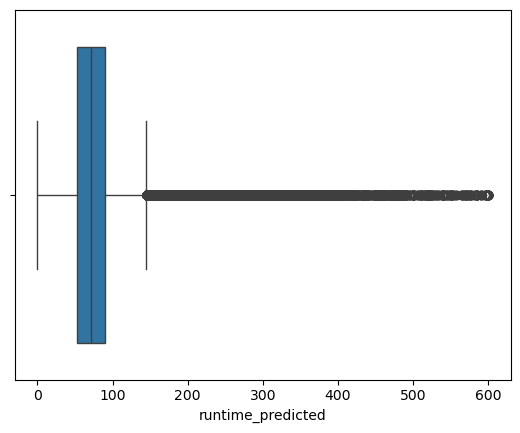

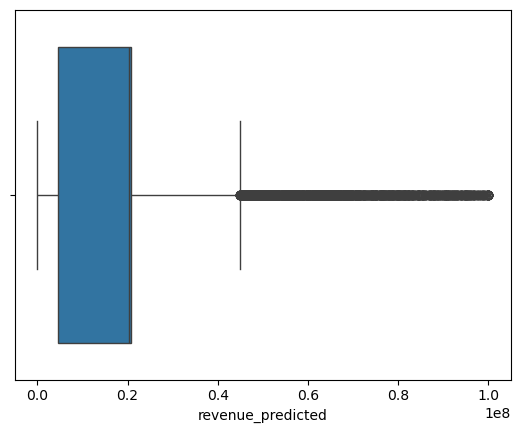

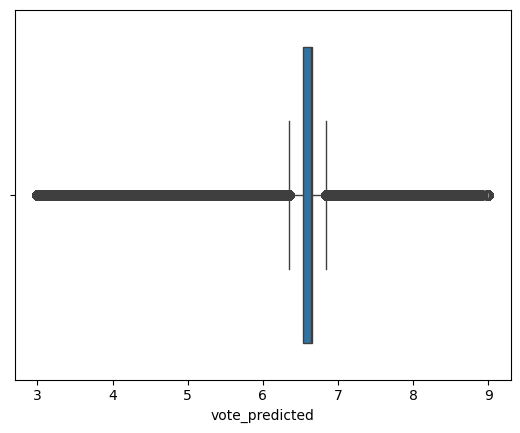

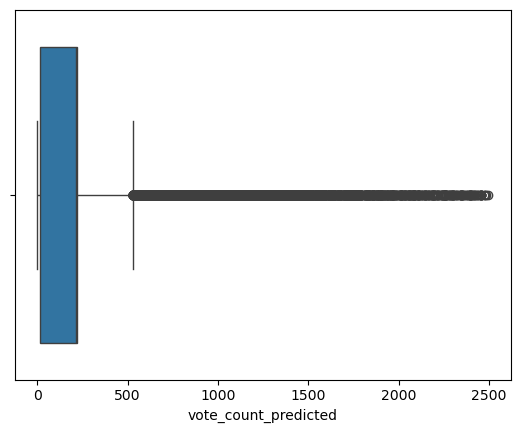

In [47]:
numerical_df = df_combined_unique[['popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_predicted', 'vote_count_predicted']]
#checkong for outliers
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None   
outlier(numerical_df)

In [48]:
df_combined_unique.describe().T

,count,mean,std,min,25%,50%,75%,max
vote_average,274994.0,6.052949e+00,1.332595e+00,3.0,5.000000e+00,6.000000e+00,7.000000e+00,9.000000e+00
vote_count,275331.0,2.879458e+01,1.287600e+02,1.0,1.000000e+00,3.000000e+00,1.000000e+01,2.497000e+03
revenue,13701.0,9.755659e+06,1.755591e+07,-12.0,1.039710e+05,1.845819e+06,1.052251e+07,1.000000e+08
runtime,610910.0,7.197567e+01,5.042143e+01,5.0,2.500000e+01,7.800000e+01,9.800000e+01,6.000000e+02
budget,33048.0,3.082832e+06,7.630433e+06,100.0,2.500000e+03,5.000000e+04,1.900000e+06,6.000000e+07
popularity,880870.0,1.133241e+00,1.924973e+00,0.0,6.000000e-01,6.000000e-01,8.880000e-01,2.498800e+01
year,767483.0,1.998984e+03,2.670330e+01,1874.0,1.988000e+03,2.010000e+03,2.018000e+03,2.027000e+03
budget_predicted,880870.0,2.405780e+06,2.602297e+06,0.0,1.109107e+06,2.063251e+06,2.945605e+06,6.000000e+07
runtime_predicted,880870.0,7.192523e+01,4.210397e+01,0.0,5.300000e+01,7.193268e+01,9.000000e+01,6.000000e+02
revenue_predicted,880870.0,1.533800e+07,8.405519e+06,-12.0,4.487228e+06,2.040082e+07,2.066913e+07,1.000000e+08


In [49]:
# Create new dataframe, repeating or chaining as appropriate

# Calculate lengths of splits
lens = df_combined_unique['genres'].str.split(',').map(len)


df_final = pd.DataFrame({
    'year': np.repeat(df_combined_unique['year'], lens),
    'genres': chainer(df_combined_unique['genres']),
    'popularity': np.repeat(df_combined_unique['popularity'], lens),
    'budget_predicted': np.repeat(df_combined_unique['budget_predicted'], lens),
    'runtime_predicted': np.repeat(df_combined_unique['runtime_predicted'], lens),
    'revenue_predicted': np.repeat(df_combined_unique['revenue_predicted'], lens),
    'vote_predicted': np.repeat(df_combined_unique['vote_predicted'], lens),
    'vote_count_predicted': np.repeat(df_combined_unique['vote_count_predicted'], lens)
})

# Strip any extra whitespace from the genres
df_final['genres'] = df_final['genres'].str.strip()

#df_final['production_company'] = df_final['production_company'].str.strip()

df_final.head()

,year,genres,popularity,budget_predicted,runtime_predicted,revenue_predicted,vote_predicted,vote_count_predicted
1791,2010.0,Comedy,22.032,5000000.0,89.0,5224938.0,7.361,2497.0
1791,2010.0,Horror,22.032,5000000.0,89.0,5224938.0,7.361,2497.0
1793,2013.0,Drama,18.094,11000000.0,104.0,32935319.0,7.203,2482.0
1793,2013.0,Music,18.094,11000000.0,104.0,32935319.0,7.203,2482.0
1795,2014.0,Drama,18.879,2000000.0,85.0,4635300.0,6.899,2479.0


In [50]:
df_final.shape

(1162424, 8)

In [51]:
categorical_to_encode = ['genres'] 
numerical_to_scale = ['year', 'popularity', 'budget_predicted', 'runtime_predicted', 'revenue_predicted', 'vote_predicted', 'vote_count_predicted']

In [52]:
df_final[categorical_to_encode] = df_final[categorical_to_encode].fillna(df_final[categorical_to_encode].mode())
# ordinal encode categorical
encoder = OrdinalEncoder()
df_final[categorical_to_encode] = encoder.fit_transform(df_final[categorical_to_encode])

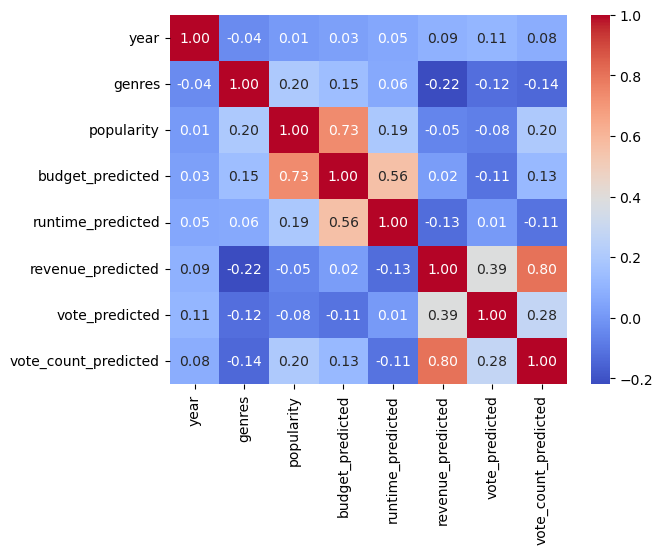

In [53]:
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [54]:
df_final.isnull().sum()

year                    125442
genres                       0
popularity                   0
budget_predicted             0
runtime_predicted            0
revenue_predicted            0
vote_predicted               0
vote_count_predicted         0
dtype: int64

In [55]:
df_final.drop(columns='year', inplace=True)

In [56]:
df_final.drop(columns='popularity', inplace=True)

In [57]:
df_sample = df_final.sample(n=8000, random_state=42)

In [58]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(df_sample)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=df_sample.columns).head()

,genres,budget_predicted,runtime_predicted,revenue_predicted,vote_predicted,vote_count_predicted
0,2.275589,0.942777,0.751064,-1.524018,-0.257142,0.618392
1,1.280481,-0.215177,-0.056273,0.711862,0.279195,0.523980
2,0.285372,-0.859532,-1.523970,0.708542,0.167532,0.590027
3,-0.908758,0.394700,1.319822,0.718948,0.382966,0.464990
4,0.683416,-0.215177,-0.056273,0.711862,0.279195,0.523980


C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

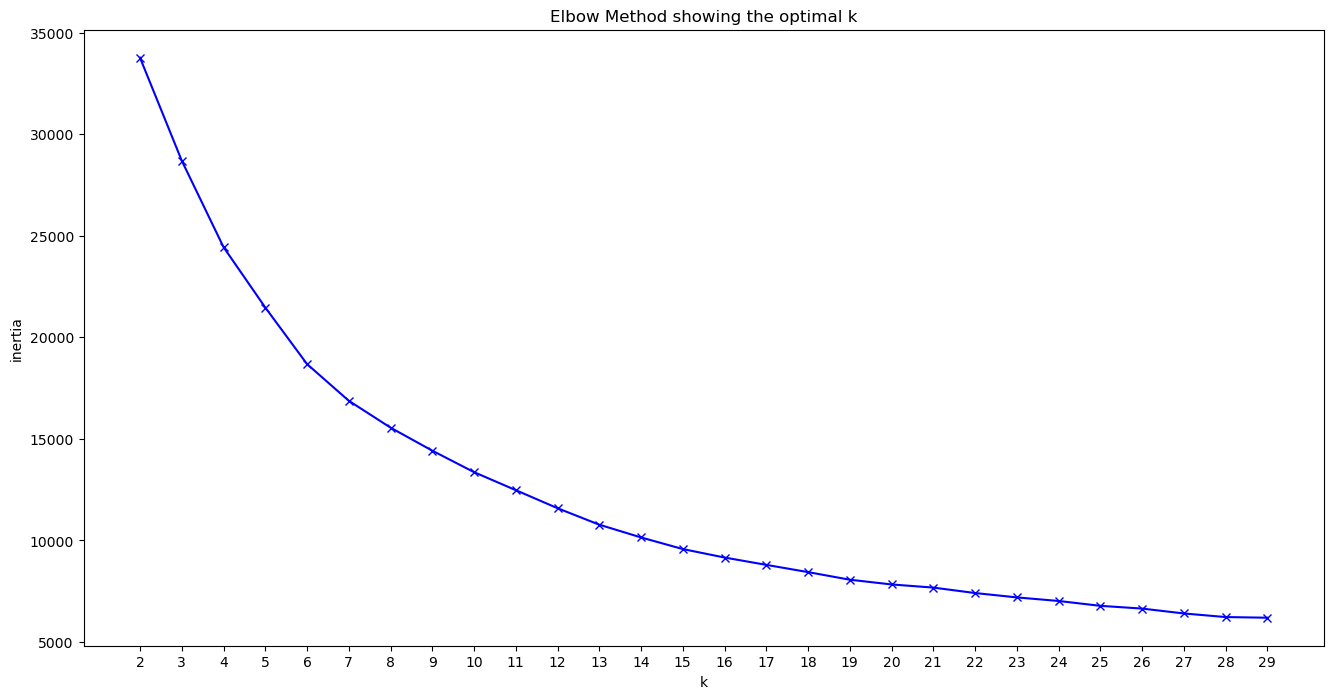

In [59]:
K = range(2, 30)
inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    predictions=kmeans.predict(X_prep)
    silhouette.append(silhouette_score(X_prep, predictions))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

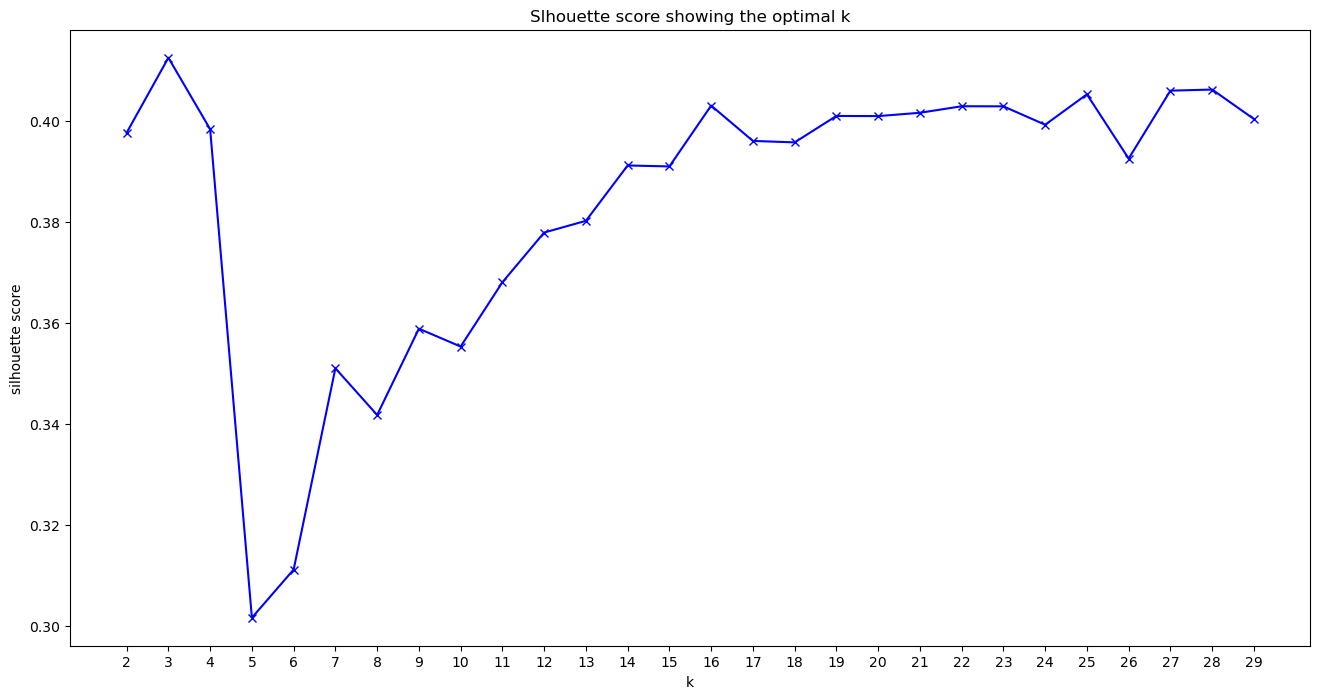

In [60]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [61]:
X_prep = scaler.fit_transform(df_final)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=df_final.columns).head()

# Train a KMeans clustering model
kmeans = KMeans(n_clusters=22, random_state=42)
kmeans.fit(X_prep)

C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=22, random_state=42)

In [62]:
df_final = pd.DataFrame({
    'year': np.repeat(df_combined_unique['year'], lens),
    'genres': chainer(df_combined_unique['genres']),
    'popularity': np.repeat(df_combined_unique['popularity'], lens),
    'budget_predicted': np.repeat(df_combined_unique['budget_predicted'], lens),
    'runtime_predicted': np.repeat(df_combined_unique['runtime_predicted'], lens),
    'revenue_predicted': np.repeat(df_combined_unique['revenue_predicted'], lens),
    'vote_predicted': np.repeat(df_combined_unique['vote_predicted'], lens),
    'vote_count_predicted': np.repeat(df_combined_unique['vote_count_predicted'], lens),
    'original_title': np.repeat(df_combined_unique['original_title'], lens)
})

# Strip any extra whitespace from the genres
df_final['genres'] = df_final['genres'].str.strip()


In [63]:
#Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
df_final['predictions'] = clusters

In [64]:
df_final

,year,genres,popularity,budget_predicted,runtime_predicted,revenue_predicted,vote_predicted,vote_count_predicted,original_title,predictions
1791,2010.0,Comedy,22.032,5.000000e+06,89.000000,5.224938e+06,7.361000,2497.000000,Tucker and Dale vs. Evil,14
1791,2010.0,Horror,22.032,5.000000e+06,89.000000,5.224938e+06,7.361000,2497.000000,Tucker and Dale vs. Evil,14
1793,2013.0,Drama,18.094,1.100000e+07,104.000000,3.293532e+07,7.203000,2482.000000,Inside Llewyn Davis,14
1793,2013.0,Music,18.094,1.100000e+07,104.000000,3.293532e+07,7.203000,2482.000000,Inside Llewyn Davis,14
1795,2014.0,Drama,18.879,2.000000e+06,85.000000,4.635300e+06,6.899000,2479.000000,Locke,14
...,...,...,...,...,...,...,...,...,...,...
1040694,1981.0,,0.600,2.063251e+06,71.932681,2.066913e+07,6.636697,218.695369,As Carrancas do Rio São Francisco,2
1040695,2003.0,,0.882,2.859083e+06,90.000000,2.082242e+07,6.666810,226.014984,Stalin: Man of Steel,2
1040697,2013.0,Documentary,0.600,0.000000e+00,5.000000,2.095669e+07,6.525604,231.467787,After Earth: The Nature of the Future,11
1040698,NaN,,0.600,2.063251e+06,71.932681,2.066913e+07,6.636697,218.695369,Ketnet musical 'Kadanza,2


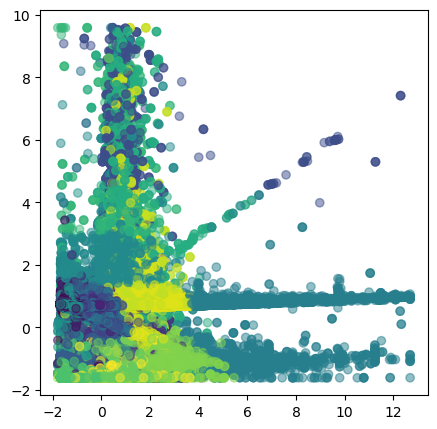

In [65]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 2], X_prep[:, 3], c=clusters,alpha=0.5)
plt.show()

In [66]:
kmeans.inertia_ 

1131157.287071611

In [67]:
df_final

,year,genres,popularity,budget_predicted,runtime_predicted,revenue_predicted,vote_predicted,vote_count_predicted,original_title,predictions
1791,2010.0,Comedy,22.032,5.000000e+06,89.000000,5.224938e+06,7.361000,2497.000000,Tucker and Dale vs. Evil,14
1791,2010.0,Horror,22.032,5.000000e+06,89.000000,5.224938e+06,7.361000,2497.000000,Tucker and Dale vs. Evil,14
1793,2013.0,Drama,18.094,1.100000e+07,104.000000,3.293532e+07,7.203000,2482.000000,Inside Llewyn Davis,14
1793,2013.0,Music,18.094,1.100000e+07,104.000000,3.293532e+07,7.203000,2482.000000,Inside Llewyn Davis,14
1795,2014.0,Drama,18.879,2.000000e+06,85.000000,4.635300e+06,6.899000,2479.000000,Locke,14
...,...,...,...,...,...,...,...,...,...,...
1040694,1981.0,,0.600,2.063251e+06,71.932681,2.066913e+07,6.636697,218.695369,As Carrancas do Rio São Francisco,2
1040695,2003.0,,0.882,2.859083e+06,90.000000,2.082242e+07,6.666810,226.014984,Stalin: Man of Steel,2
1040697,2013.0,Documentary,0.600,0.000000e+00,5.000000,2.095669e+07,6.525604,231.467787,After Earth: The Nature of the Future,11
1040698,NaN,,0.600,2.063251e+06,71.932681,2.066913e+07,6.636697,218.695369,Ketnet musical 'Kadanza,2


In [ ]:
import random

# Ask the user to enter the name of a movie
movie_name = input("Please enter the name of a movie you like: ")
# Convert the movie name to lowercase
lower_movie_name = movie_name.lower()

# Check if the entered movie is in the top 100 DataFrame
if df_top100['title'].str.lower().isin([lower_movie_name]).any():
    # Filter out the entered movie from the repertoire
    recommended_movies = df_top100.loc[df_top100['title'].str.lower() != lower_movie_name, 'title']
    
    # Randomly select one movie from the recommended movies list
    recommended_movie = random.choice(recommended_movies.tolist())
    
    print("We recommend you this movie:", recommended_movie)

# Check if the entered movie is in the final DataFrame
elif df_final['original_title'].str.lower().isin([lower_movie_name]).any():
    
    # Filter the dataset to include only movies from the predicted cluster
    movie_in_cluster = df_final[df_final['predictions'] == clusters[0]]
        
    # Extract the genres of the input movie
    input_movie_genres = df_final[df_final['original_title'].str.lower() == lower_movie_name]['genres'].values[0]
        
    # Filter movies in the cluster by the same genres
    movie_in_cluster_same_genres = movie_in_cluster[movie_in_cluster['genres'] == input_movie_genres]
        
    # Initialize recommended_movie1
    recommended_movie1 = lower_movie_name
        
    # Recommend a movie from the cluster ( because the same movie name can be repeated with different genres)
    while recommended_movie1 == lower_movie_name:
            recommended_movie1 = movie_in_cluster_same_genres.sample(1)['original_title'].values[0]
     
    print("We recommend you this movie:", recommended_movie1)
else:
    print("Movie not found in the dataset")
